### 영상 프레임 저장

In [4]:
def get_train_img(source_file_name, save_path, every_n_frames):

    import os
    import time
    import cv2
    import yaml
    import random

    HOME = os.getcwd()

    os.makedirs(f"{HOME}\\{save_path}", exist_ok=True)
    os.makedirs(f"{HOME}\\{save_path}\\images", exist_ok=True)
    os.makedirs(f"{HOME}\\{save_path}\\images\\train", exist_ok=True)
    os.makedirs(f"{HOME}\\{save_path}\\images\\val", exist_ok=True)

    os.makedirs(f"{HOME}\\{save_path}\\labels", exist_ok=True)
    os.makedirs(f"{HOME}\\{save_path}\\labels\\train", exist_ok=True)
    os.makedirs(f"{HOME}\\{save_path}\\labels\\val", exist_ok=True)

    capture = cv2.VideoCapture(f"{HOME}\\{source_file_name}")
    caputre_frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

    count = 0

    while(capture.isOpened()):

        ret, image = capture.read()

        if int(capture.get(1)) == caputre_frame_count:
            break

        if (int(capture.get(1)) % every_n_frames == 0):
            print(f"Saved frame number: {str(int(capture.get(1)))}")

            temp_num = random.uniform(0, 1)

            if temp_num >= 0.2:
                cv2.imwrite(f"{HOME}\\{save_path}\\images\\train\\{str(count)}.jpg", image)
                count += 1

            else:
                cv2.imwrite(f"{HOME}\\{save_path}\\images\\val\\{str(count)}.jpg", image)
                count += 1

# source 파일명, save_path, 몇 프레인 단위 캡쳐
get_train_img(source_file_name='forklift_test.mp4', save_path='datasets\\forklift_datasets_test', every_n_frames=5)

Saved frame number: 5
Saved frame number: 10
Saved frame number: 15
Saved frame number: 20
Saved frame number: 25
Saved frame number: 30
Saved frame number: 35
Saved frame number: 40
Saved frame number: 45
Saved frame number: 50
Saved frame number: 55
Saved frame number: 60
Saved frame number: 65
Saved frame number: 70
Saved frame number: 75
Saved frame number: 80
Saved frame number: 85
Saved frame number: 90
Saved frame number: 95
Saved frame number: 100
Saved frame number: 105
Saved frame number: 110
Saved frame number: 115
Saved frame number: 120
Saved frame number: 125
Saved frame number: 130
Saved frame number: 135
Saved frame number: 140
Saved frame number: 145
Saved frame number: 150
Saved frame number: 155
Saved frame number: 160
Saved frame number: 165
Saved frame number: 170
Saved frame number: 175
Saved frame number: 180
Saved frame number: 185
Saved frame number: 190
Saved frame number: 195
Saved frame number: 200
Saved frame number: 205
Saved frame number: 210
Saved frame 

### YOLO model 학습

In [1]:
import os
import yaml
from ultralytics import YOLO

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

HOME = os.getcwd()

with open(f'{HOME}\\datasets\\forklift_datasets_test\\labels\\train\\classes.txt', 'r') as f:
    classes_txt = f.read().splitlines()

data = {'train': f'{HOME}\\datasets\\forklift_datasets_test\\images\\train', \
        'val': f'{HOME}\\datasets\\forklift_datasets_test\\images\\val', \
        'names': classes_txt, \
        'nc': len(classes_txt)}

with open(f'{os.getcwd()}\\datasets\\forklift_datasets_test\\data.yaml', 'w') as f:
    yaml.dump(data, f)

model = YOLO('yolov8s.pt')
model.train(data=f'{HOME}\\datasets\\forklift_datasets_test\\data.yaml', epochs=15, device='cpu')

New https://pypi.org/project/ultralytics/8.3.161 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.133  Python-3.9.21 torch-2.7.0+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=d:\Work\Study\YOLO_LSTM\datasets\forklift_datasets_test\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tra

train: Scanning D:\Work\Study\YOLO_LSTM\datasets\forklift_datasets_test\labels\train.cache... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]
d:\Tool\Anaconda\envs\yolotest1\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


val: Fast image access  (ping: 0.30.1 ms, read: 3.61.0 MB/s, size: 140.2 KB)


val: Scanning D:\Work\Study\YOLO_LSTM\datasets\forklift_datasets_test\labels\val.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
d:\Tool\Anaconda\envs\yolotest1\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.117      2.268      1.104          9        640: 100%|██████████| 9/9 [02:00<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.73s/it]

                   all         22         49       0.82      0.742      0.795      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G     0.8439     0.9396     0.9755         12        640: 100%|██████████| 9/9 [01:48<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         22         49      0.952      0.959      0.977      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G     0.7456     0.7289     0.8997          3        640: 100%|██████████| 9/9 [01:48<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all         22         49      0.935      0.976      0.959       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G     0.7163     0.6269     0.8988         10        640: 100%|██████████| 9/9 [01:49<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all         22         49      0.908      0.978      0.982      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G     0.7612     0.6748     0.9466          3        640: 100%|██████████| 9/9 [01:47<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         22         49      0.981      0.894      0.915        0.7


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


d:\Tool\Anaconda\envs\yolotest1\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
       6/15         0G     0.7731     0.7514     0.9378          2        640: 100%|██████████| 9/9 [01:54<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]

                   all         22         49      0.824      0.919      0.956      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G     0.7981     0.7368     0.9601          3        640: 100%|██████████| 9/9 [01:53<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

                   all         22         49      0.853      0.831      0.904      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G     0.7851     0.5955     0.9263          3        640: 100%|██████████| 9/9 [01:55<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]

                   all         22         49      0.759      0.683      0.758      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G     0.7691     0.5892     0.9132          5        640: 100%|██████████| 9/9 [01:53<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]

                   all         22         49      0.611      0.807      0.775      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G     0.7265     0.5632     0.9055          5        640: 100%|██████████| 9/9 [01:53<00:00, 12.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

                   all         22         49      0.744      0.839      0.764      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G     0.7387     0.5577     0.8854          4        640: 100%|██████████| 9/9 [01:54<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]

                   all         22         49      0.898      0.871      0.952      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G     0.7178     0.5539     0.9105          4        640: 100%|██████████| 9/9 [01:55<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]

                   all         22         49      0.969      0.959      0.992      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G     0.6538     0.4874     0.9008          5        640: 100%|██████████| 9/9 [01:55<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]

                   all         22         49      0.979      0.981      0.994      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G     0.6723     0.5075      0.919          4        640: 100%|██████████| 9/9 [01:56<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all         22         49      0.986      0.981      0.981      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G     0.6294     0.4494      0.868          3        640: 100%|██████████| 9/9 [01:54<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all         22         49      0.969      0.981      0.981      0.777



15 epochs completed in 0.495 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 22.5MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics 8.3.133  Python-3.9.21 torch-2.7.0+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]


                   all         22         49      0.979      0.981      0.994      0.785
                Person         15         26      0.981      0.962      0.993      0.747
              Forklift         16         23      0.976          1      0.995      0.824
Speed: 1.4ms preprocess, 158.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002C2A836B100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [2]:
from ultralytics import YOLO
import cv2
import os

def run_yolo_inference(input_video='forklift_test.mp4',
                       output_video='detected_forklift_test.mp4',
                       model_path='runs/detect/train5/weights/best.pt'):
    
    model = YOLO(model_path)
    cap = cv2.VideoCapture(input_video)

    # 영상 정보 추출
    fps = cap.get(cv2.CAP_PROP_FPS)
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (w, h))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)

        cv2.imshow("Detected", annotated_frame)  
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Inference 완료 -> {output_video}")

run_yolo_inference()


0: 384x640 1 Person, 1 Forklift, 197.4ms
Speed: 5.3ms preprocess, 197.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 180.2ms
Speed: 3.6ms preprocess, 180.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 165.5ms
Speed: 3.0ms preprocess, 165.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 164.0ms
Speed: 4.1ms preprocess, 164.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 179.8ms
Speed: 3.9ms preprocess, 179.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 201.6ms
Speed: 51.9ms preprocess, 201.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 161.9ms
Speed: 3.2ms preprocess, 161.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Perso

In [7]:
from deep_sort_realtime.deepsort_tracker import DeepSort
from ultralytics import YOLO
import cv2
import pandas as pd
from datetime import datetime

model = YOLO('runs/detect/train3/weights/best.pt')
tracker = DeepSort()

cap = cv2.VideoCapture('detected_forklift_2.mp4')
all_results = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    detections = []
    results = model(frame)[0]
    for box in results.boxes.data.tolist():
        x1, y1, x2, y2, conf, cls = box
        cx, cy = (x1+x2)/2, (y1+y2)/2
        detections.append(([x1, y1, x2, y2], conf, int(cls)))

    tracks = tracker.update_tracks(detections, frame=frame)
    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        ltrb = track.to_ltrb()
        cx, cy = (ltrb[0] + ltrb[2]) / 2, (ltrb[1] + ltrb[3]) / 2

        all_results.append({
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M::%S"),
            'track_id': track_id,
            'cx': cx,
            'cy': cy
        })

cap.release()

df = pd.DataFrame(all_results)
df.to_csv('object_tracks_2.csv', index=False)
print("객체 추적 결과 저장 완료: object_tracks_2.csv")


0: 384x640 1 Person, 1 Forklift, 401.0ms
Speed: 56.6ms preprocess, 401.0ms inference, 34.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Forklift, 157.2ms
Speed: 3.8ms preprocess, 157.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 175.8ms
Speed: 4.1ms preprocess, 175.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 176.8ms
Speed: 3.2ms preprocess, 176.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 165.4ms
Speed: 3.3ms preprocess, 165.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 172.5ms
Speed: 3.4ms preprocess, 172.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 168.3ms
Speed: 3.3ms preprocess, 168.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Fork

### data 전처리

In [8]:
df = pd.read_csv('object_tracks_2.csv', names=['timestamp', 'track_id', 'cx', 'cy'])

df['timestamp'] = df['timestamp'].str.replace("::", ":", regex=False)

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

df = df.dropna(subset=['timestamp'])

df['track_id'] = df['track_id'].astype(int)

print(df.head())

            timestamp  track_id                  cx                 cy
1 2025-06-16 09:47:39         1  116.38706257736024  528.4264826442219
2 2025-06-16 09:47:39         1  118.87608926253799  526.4834799519421
3 2025-06-16 09:47:39         1  120.47756898289546  526.9146397820502
4 2025-06-16 09:47:39         3  145.77886759875088  537.4088320743733
5 2025-06-16 09:47:40         1   121.1476625593771  529.1657183185066


C:\Users\이원빈\AppData\Local\Temp\ipykernel_28104\2868177571.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


### 시퀀스 데이터 전처리 및 모델 학습
고정형 CCTV가 아니기에 고정형 x와 y의 좌표값이 아닌 지게차가 움직인 delta값으로 지게차의 움직임을 예측하는 LSTM 데이터셋 활용용

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
import os

df = pd.read_csv("object_tracks_2.csv")

# 이동량 계산
df = df.sort_values(by=['track_id', 'timestamp'])
df['delta_cx'] = df.groupby('track_id')['cx'].diff()
df['delta_cy'] = df.groupby('track_id')['cy'].diff()
df = df.dropna(subset=['delta_cx', 'delta_cy'])
df['speed'] = np.sqrt(df['delta_cx']**2 + df['delta_cy']**2)
df['angle'] = np.arctan2(df['delta_cy'], df['delta_cx'])

# 움직임 적은 track 제거
total_movement = df.groupby('track_id')['speed'].sum()
valid_tracks = total_movement[total_movement > 20].index # threshold 조절 가능
df_filtered = df[df['track_id'].isin(valid_tracks)]

# 정규화
features = ['cx', 'cy', 'speed', 'angle']
scaler = MinMaxScaler()
df_filtered[features] = scaler.fit_transform(df_filtered[features])

# 시퀀스 생성 함수
def create_delta_sequences(df, sequence_length=10):
    sequences, targets = [], []

    for track_id, group in df.groupby("track_id"):
        values = group[features].values
        if len(values) < sequence_length + 1:
            continue
        for i in range(len(values) - sequence_length):
            seq = values[i:i+sequence_length]
            target = values[i+sequence_length][:2]
            sequences.append(seq)
            targets.append(target)

    return np.array(sequences), np.array(targets)

X, y = create_delta_sequences(df_filtered, sequence_length=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM 모델 정의
def build_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [10]:
# 모델 학습
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

model = build_lstm_model(X_train.shape[1:])

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 모델 저장
os.makedirs("models", exist_ok=True)
model.save("models/lstm_delta_model_2.h5")
print("모델 저장완료: models/lstm_delta_model_2.h5")

Epoch 1/300


d:\Tool\Anaconda\envs\yolotest1\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.1295 - val_loss: 0.0258
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0252 - val_loss: 0.0045
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0120 - val_loss: 0.0029
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0082 - val_loss: 0.0017
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0071 - val_loss: 0.0013
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0057 - val_loss: 0.0010
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053 - val_loss: 6.9731e-04
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0050 - val_loss: 8.5073e-04
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - l

모델 저장완료: models/lstm_delta_model_2.h5


### 모델 평가 및 시각화

In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, r2_score

model = load_model("models/lstm_delta_model_2.h5", compile=False)
y_pred = model.predict(X_test)

y_true_inv = scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], 2))], axis=1))[:, :2]
y_pred_inv = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], 2))], axis=1))[:, :2]

mse = np.mean((y_true_inv - y_pred_inv) ** 2)
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")



5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step
MSE: 1079.4932
MAE: 21.8800
R2 Score: 0.9848


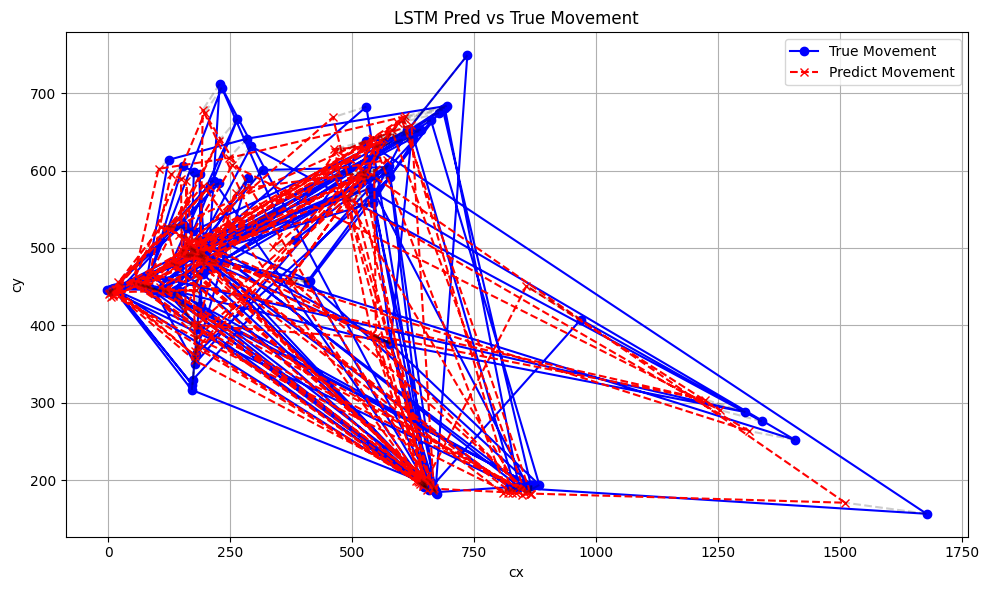

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_true_inv[:, 0], y_true_inv[:, 1], 'bo-', label='True Movement')
plt.plot(y_pred_inv[:, 0], y_pred_inv[:, 1], 'rx--', label='Predict Movement')
for i in range(len(y_pred_inv)):
    plt.plot([y_true_inv[i, 0], y_pred_inv[i, 0]], [y_true_inv[i, 1], y_pred_inv[i, 1]], 'k--', alpha=0.2)

plt.xlabel("cx")
plt.ylabel("cy")
plt.title("LSTM Pred vs True Movement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from ultralytics import YOLO

def is_inside(bbox_person, bbox_forklift, tolerance=0.1):
    px1, py1, px2, py2 = bbox_person
    fx1, fy1, fx2, fy2 = bbox_forklift

    fx1 -= tolerance * (fx2 - fx1)
    fx2 += tolerance * (fx2 - fx1)
    fy1 -= tolerance * (fy2 - fy1)
    fy2 += tolerance * (fy2 - fy1)

    return (px1 > fx1 and px2 < fx2 and py1 > fy1 and py2 < fy2)

def calc_center(bbox):
    x1, y1, x2, y2 = bbox
    return ((x1+x2)/2, (y1+y2)/2)

def calc_distance(c1, c2):
    return np.linalg.norm(np.array(c1) - np.array(c2))

model = YOLO("runs/detect/train3/weights/best.pt")
tracker = DeepSort()

cap = cv2.VideoCapture("detected_forklift_2.mp4")

risk_counter = 0 # 위험 감지 횟수 초기화화

while cap.isOpened():
    ret, frame = cap.read()
    if not ret: break

    results = model(frame)[0]

    detections = []
    for box in results.boxes.data.tolist():
        x1, y1, x2, y2, conf, cls = box
        class_id = int(cls)
        detections.append(([x1, y1, x2, y2], conf, class_id))

    tracks = tracker.update_tracks(detections, frame=frame)

    persons = []
    forklifts = []

    for track in tracks:
        if not track.is_confirmed(): continue
        bbox = track.to_ltrb()

        if track.det_class == 0:
            persons.append(bbox)
        elif track.det_class == 1:
            forklifts.append(bbox)

    for person_bbox in persons:
        inside_any_forklift = False
        for forklift_bbox in forklifts:
            if is_inside(person_bbox, forklift_bbox):
                inside_any_forklift = True
                break
        
        if not inside_any_forklift:
            # 외부 사람 -> 거리 계산
            pc = calc_center(person_bbox)
            for forklift_bbox in forklifts:
                fc = calc_center(forklift_bbox)
                distance = calc_distance(pc, fc)

                if distance < 100: # 위험 임계값
                    print("근접 위험 감지!")
                    risk_counter += 1

cap.release()

print(f"총 위험 감지 횟수: {risk_counter}회")



0: 384x640 1 Person, 1 Forklift, 169.6ms
Speed: 5.5ms preprocess, 169.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Forklift, 161.6ms
Speed: 3.8ms preprocess, 161.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 170.1ms
Speed: 3.0ms preprocess, 170.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 169.6ms
Speed: 3.3ms preprocess, 169.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 174.9ms
Speed: 3.4ms preprocess, 174.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 183.4ms
Speed: 3.6ms preprocess, 183.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forklift, 181.5ms
Speed: 2.7ms preprocess, 181.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Person, 1 Forkli

In [31]:
# TODO : YOLO + DeepSORT + LSTM 사용해서 위험 감지 횟수를 측정하는 모델 만들기

In [14]:
from collections import defaultdict, deque

sequence_length = 30 # 10FPS 기준 3초
track_buffers = defaultdict(lambda: deque(maxlen=sequence_length))

for track in tracks:
    track_id = track.track_id
    bbox = track.to_ltrb()
    cx, cy = calc_center(bbox)
    track_buffers[track_id].append([cx, cy])

    if len(track_buffers[track_id]) == sequence_length:
        input_seq = np.array(track_buffers[track_id]).reshape(1, sequence_length, 2)
        predicted_cx, predicted_cy = build_lstm_model.predict(input_seq)